### James Chukwuka Tabansi
## Context
- There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

- In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

- As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

* Objective
    - To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

- Data Description
    - The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

- Data Dictionary

    - S.No.: Serial number
    - Name: Name of the car which includes brand name and model name
    - Location: Location in which the car is being sold or is available for purchase
    - Year: Manufacturing year of the car
    - Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
    - Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
    - Transmission: The type of transmission used by the car (Automatic/Manual)
    - Owner: Type of ownership
    - Mileage: The standard mileage offered by the car company in kmpl or km/kg
    - Engine: The displacement volume of the engine in CC
    - Power: The maximum power of the engine in bhp
    - Seats: The number of seats in the car
    - New_Price: The price of a new car of the same model in dollars
    - Price: The price of the used car in dollars



###  import relevant libraries

In [1]:
#for reading the file as a dataframe
import pandas as pd
# for plotting figures
import matplotlib.pyplot as plt
import seaborn as sns

#for complex maths operations
import numpy as np

#for linear regression, metrics and preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Data Preprocessing

In [2]:
#declare variable as path name
path = "/Users/user/Downloads/used_cars_data-1.csv"

#read the file
data = pd.read_csv(path)

#display a sample of the data
data.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6166,6166,Maruti Wagon R LXI,Delhi,2012,64692,Petrol,Manual,First,22.5 kmpl,998 CC,67.04 bhp,5.0,4.59,NaN
7001,7001,Maruti Ertiga VXI,Jaipur,2014,98000,Petrol,Manual,First,16.02 kmpl,1373 CC,93.7 bhp,7.0,11.27,NaN
1523,1523,Volkswagen Vento Petrol Trendline,Bangalore,2012,52000,Petrol,Manual,First,15.04 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.45
5262,5262,Tata Tiago 1.2 Revotron XM Option,Chennai,2016,5400,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.45,3.98
3783,3783,Nissan X-Trail SLX MT,Pune,2010,128000,Diesel,Manual,Second,14.42 kmpl,1995 CC,147.6 bhp,5.0,11.33,6.20
4903,4903,Hyundai EON Sportz,Coimbatore,2014,14799,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,10.25,4.14
4882,4882,Toyota Fortuner 4x2 AT,Hyderabad,2012,158000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,37.17,17.49
75,75,Audi A6 2.0 TDI Design Edition,Delhi,2014,56000,Diesel,Automatic,Second,18.53 kmpl,1968 CC,187.74 bhp,5.0,67.10,29.50
6563,6563,Hyundai i20 Magna Optional 1.2,Kolkata,2013,46000,Petrol,Manual,Second,18.5 kmpl,1197 CC,82.9 bhp,5.0,10.25,NaN
5029,5029,Ford Figo Aspire 1.2 Ti-VCT Ambiente,Chennai,2016,29875,Petrol,Manual,First,18.16 kmpl,1196 CC,86.8 bhp,5.0,7.65,4.85


In [3]:
data.shape

(7253, 14)

- there are 7,253 rows of data and 14 columns
- Mileage has two type of units kmpl and km/kg

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- some variables such as (mileage, engine, power, seats  and price) have missing data
- mileage, engine, power appear as object datatypes instead of floats


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Name
    - there are 2041 different car model and brand in our data of which the mode is "Mahindra XUV500 W8 2WD" and it occurs 55 times
  
* Location
    - from our data, there are 11 different places in India that used cars are sold and Mumbai is the mode
    
* Year
    - the oldest used car was made in 1996, the newest in 2019. 50% of the cars were made from 2014 downwards
    
* Kilometers_Driven
    - the minimum distance in kilometers any of the car in the data recorded was 171, while the max is 6,500,000.0
    - because the mean is larger than the median, this suggest that the distribution will be right skewed
    
* Fuel_Type
    - all the cars use one of 5 fuel type, and most of them (3,852) make use of diesel

* Transmission
    - the data tells that there are more used manual cars being sold in india
    
* Seats
    - 75% of the cars have 5 seats, the max seat is 10.
    - can a used car have no seat?
    * google tells that some people opt to buy used cars without car seats so that they can newer seats elsewhere
    
* New_price
    - the lowest price for a new_car is 3.91 while the most expensive is 375 dollars
    - the mean are median are approximately thesame hence it is expected that the distribution is approxiamtely normal
    
* Price
    - - the lowest price for a used car is 0.44 while the most expensive is 160 dollars
    - the mean is larger than the median, this suggest that the distribution will be right skewed and notes that the target is not normally distributed and this violates a linear model assumption. hence i would transfrom it to achieve linearity.

In [6]:
data.duplicated().sum()

0

- there are duplicated rows in the data

### treating missing values

In [7]:
#check for missing values
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [8]:
#because the target (Price) has missing values, all the missing values will be dropped
data.dropna(subset=["Price"],inplace=True, axis=0)

#reset index
data.reset_index(drop=True, inplace=True)


#data.isnull().sum()


In [9]:
def check(df, col):
    """return a subset of the data that has Mileage with Km/Kg as it units"""
    for var in df[col]:
        if "km/kg" in var:
            return df[df[col] == var]

In [10]:
check(data, 'Mileage')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,3.25
1357,1357,Maruti Wagon R LXI CNG,Mumbai,2014,40000,CNG,Manual,Second,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,3.15
1780,1780,Maruti Wagon R LXI CNG,Mumbai,2013,25755,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,3.15
1911,1911,Maruti Wagon R LXI CNG,Ahmedabad,2016,77000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,3.30
2376,2376,Maruti Wagon R LXI CNG,Hyderabad,2013,83875,CNG,Manual,Second,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,2.95
3008,3008,Maruti Wagon R LXI CNG,Delhi,2014,48500,CNG,Manual,Second,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,2.85
3295,3295,Maruti Wagon R LXI CNG,Delhi,2013,62000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,2.80
4411,4411,Maruti Wagon R LXI CNG,Kochi,2014,68365,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,3.77
4920,4920,Maruti Wagon R LXI CNG,Pune,2014,58000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,3.00


- this shows that the Maruti wagon R lxi cng uses CNG and  have their mileage in km/kg


#### treating the units in Mileage, Engine, Power

- all these units will be dropped, km/kg will be converted to kmpl first

In [11]:
def edit_column(var):
    """return a float or integer for each variable in the column"""
    #for missing values
    if isinstance(var, float):
        pass
    #for mileage column
    elif "km/kg" in var:
        #convert the values with km/kg units to kmpl by multiplying with 1.40
        new_var = (float(var.strip(" km/kg")) * 1.40) #remove the specified elements
        return new_var  #return the new value
    elif "kmpl" in var:
        new_var = float(var.strip(" kmpl"))
        return new_var
    #for engine column
    elif "CC" in var:
        new_var = int(var.strip(" CC"))
        return new_var
    #for power column
    elif "bhp" in var:
        new_var = float(var.strip("bhp"))
        return new_var

In [12]:
# a list of the column 
columns = ["Mileage", "Engine", "Power"]

#for each of the column names, apply the function
for col_name in columns:
    data[col_name] = data[col_name].apply(edit_column)
    
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


In [13]:
#checking the data type of the columns
data[['Mileage', 'Engine', 'Power']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  6017 non-null   float64
 1   Engine   5983 non-null   float64
 2   Power    5876 non-null   float64
dtypes: float64(3)
memory usage: 141.2 KB


In [14]:
#descriptive statistics for 'Mileage', 'Engine', 'Power'
data[['Mileage', 'Engine', 'Power']].describe()

,Mileage,Engine,Power
count,6017.000000,5983.000000,5876.000000
mean,18.242474,1621.276450,113.253050
std,4.879633,601.355233,53.874957
min,0.000000,72.000000,34.200000
25%,15.260000,1198.000000,75.000000
50%,18.190000,1493.000000,97.700000
75%,21.100000,1984.000000,138.100000
max,46.956000,5998.000000,560.000000


- the columns contain missing values
- the minimum Mileage is zero, please note it is not possible for a car to have zero fuel mileage. hence, these rows will be dropped.


In [15]:
#a list of index of rows that has mileage as zero
zero_mileage = data.query("Mileage == 0").index.to_list()

#drop the rows
data.drop(index=zero_mileage, inplace=True)

#reset index
data.reset_index(drop=True, inplace=True)


In [16]:
data.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                25
Power                104
Seats                 30
New_Price              0
Price                  0
dtype: int64

In [17]:
# fill the missing values in "Power", "Mileage", "Engine", "Seats" by the mean of the grouped name subsets: i.e the brand name and model name
data[["Power", "Mileage", "Engine", "Seats"]] = data.groupby('Name')[["Power", "Mileage", "Engine", "Seats"]].transform(lambda x: x.fillna(x.mean()))

In [18]:
data.isnull().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               23
Power                77
Seats                27
New_Price             0
Price                 0
dtype: int64

- this means that grouping the data by 'Name' is not sufficient to fill the missing values and further analysis showed that certain car Name has missing values in the columns accross all rows such that the fillna operation to fill them will not fill all the missing values



In [19]:
df1 = data.copy()
df2 = data.copy()

- i will make two copies of the dataset.
- missing values in df1 will be filled by using the mean of the group

- the missing values in df2 will be dropped

* the idea is that cars of the same brand will have similar range of properties, hence a new column called brand will be created and used to group the data and fill the missing value with the mean

#### after this the variance change for each dataset will be observed

### handling missing data in df1

In [20]:
#from the Name column, obtain the brand name only and create a column called Brand

#create an empthy list 
brand_name = []

#iterate over the column
for i in data['Name']:
    #split each variable and save it as var
    var = i.split(" ")[0] + " " + i.split(" ")[1]
    #append var to the list
    brand_name.append(var)
    
#create a new columns using list comprehension for each item in the list    
df1["Brand"] = [item for item in brand_name]

In [21]:
df1[["Power", "Mileage", "Engine", "Seats"]] = df1.groupby('Brand')[["Power", "Mileage", "Engine", "Seats"]].transform(lambda x: x.fillna(x.mean()))

In [22]:
df1.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                7
Seats                3
New_Price            0
Price                0
Brand                0
dtype: int64

In [23]:
#drop the remaining missing values
df1.dropna(inplace=True)

#drop the S.No. column
df1.drop("S.No.", axis=1, inplace=True)

#reset index
df1.reset_index(drop=True, inplace=True)

In [24]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

### handling missing data in df2

In [25]:
#drop the remaining missing values
df2.dropna(inplace=True)

#drop the S.No. column
df2.drop("S.No.", axis=1, inplace=True)

#reset index
df2.reset_index(drop=True, inplace=True)

In [26]:
df2.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [27]:
engine= pd.DataFrame(columns=['variance', 'st_dev', 'mean', 'median'], index=['data', 'df1', 'df2'],
                        data=[[np.var(data.Engine),np.std(data.Engine),np.mean(data.Engine), np.median(data.Engine)],
                             [np.var(df1.Engine),np.std(df1.Engine),np.mean(df1.Engine), np.median(df1.Engine)],
                             [np.var(df2.Engine),np.std(df2.Engine),np.mean(df2.Engine), np.median(df2.Engine)]])
engine

,variance,st_dev,mean,median
data,358468.380024,598.722290,1619.812584,NaN
df1,356876.043488,597.391031,1619.442561,1493.0
df2,357667.798579,598.053341,1621.488760,1493.0


In [28]:
power= pd.DataFrame(columns=['variance', 'st_dev', 'mean', 'median'], index=['data', 'df1', 'df2'],
                        data=[[np.var(data.Power),np.std(data.Power),np.mean(data.Power), np.median(data.Power)],
                             [np.var(df1.Power),np.std(df1.Power),np.mean(df1.Power), np.median(df1.Power)],
                             [np.var(df2.Power),np.std(df2.Power),np.mean(df2.Power), np.median(df2.Power)]])
power

,variance,st_dev,mean,median
data,2889.606430,53.755060,112.928335,NaN
df1,2886.346813,53.724732,112.719577,93.7
df2,2889.437685,53.753490,112.947384,94.0


In [29]:
mileage= pd.DataFrame(columns=['variance', 'st_dev', 'mean', 'median'], index=['data', 'df1', 'df2'],
                        data=[[np.var(data.Mileage),np.std(data.Mileage),np.mean(data.Mileage), np.median(data.Mileage)],
                             [np.var(df1.Mileage),np.std(df1.Mileage),np.mean(df1.Mileage), np.median(df1.Mileage)],
                             [np.var(df2.Mileage),np.std(df2.Mileage),np.mean(df2.Mileage), np.median(df2.Mileage)]])
mileage

,variance,st_dev,mean,median
data,20.231573,4.497952,18.450994,NaN
df1,20.221303,4.496810,18.454723,18.24
df2,20.341442,4.510149,18.481108,18.48


* This shows that both df1 and df2 have similar variability despite different fillna method employed. however, we will make use of df1 because it has more data than df2.




### log_transformation of the price
- this is done because of the skewness expected in the target variable

In [30]:
df1["log_price"] = np.log(df1["Price"])

In [31]:
df1[["log_price","Price"]].describe().T

,count,mean,std,min,25%,50%,75%,max
log_price,5942.0,1.828888,0.865223,-0.820981,1.252763,1.731656,2.292535,5.075174
Price,5942.0,9.452524,11.128296,0.440000,3.500000,5.650000,9.900000,160.000000


- the log_price shows that the mean is approximately to the median, hence i will drop the price column

In [32]:
df1.drop(labels=["Price"], axis=1, inplace=True)

In [33]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,log_price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,5.51,Maruti Wagon,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,Hyundai Creta,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda Jazz,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,Maruti Ertiga,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,Audi A4,2.875822


In [34]:
brand_name = brand_name[0:5]

for i in df1["Name"].values[0:5]:
    print(df1[df1["Name"] == i][0:5])
    print('*' * 40)

                        Name Location  Year  Kilometers_Driven Fuel_Type  \
0     Maruti Wagon R LXI CNG   Mumbai  2010              72000       CNG   
124   Maruti Wagon R LXI CNG     Pune  2013              89900       CNG   
1199  Maruti Wagon R LXI CNG     Pune  2015              70000       CNG   
1332  Maruti Wagon R LXI CNG   Mumbai  2014              40000       CNG   
1751  Maruti Wagon R LXI CNG   Mumbai  2013              25755       CNG   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_Price  \
0          Manual      First    37.24   998.0  58.16    5.0       5.51   
124        Manual      First    37.24   998.0  58.16    5.0       5.51   
1199       Manual      First    36.68   998.0  58.20    5.0       5.51   
1332       Manual     Second    37.24   998.0  58.16    5.0       5.51   
1751       Manual      First    37.24   998.0  58.16    5.0       5.51   

             Brand  log_price  
0     Maruti Wagon   0.559616  
124   Maruti Wagon   1.178655  
11

- this shows that thesame type of car has similar attributes such as Mileage, Engine, Power, Seats, New_Price and Brand accross all rows.

### EDA summary
- thesame type of car has similar attributes such as Mileage, Engine, Power, Seats, New_Price and Brand accross all rows.
- log transformation of price was done to attain an approximate normal distribution of price variable
- the units in Mileage, Engine and power were dropped and the dtype changed to float.
- the missing values were filled by grouping the data based on similar brand and Name
- rows with zero mileage have been dropped because no car can have zero mileage

### Data visualization

In [35]:
#select the categorical columns in the dataset
cat_cols = df1.select_dtypes(include="object").columns
cat_cols
#loop through the data and get the counts for each of the variables

for item in cat_cols:
    print(item)
    print(df1[item].value_counts())
    print('-' * 50)

Name
Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Chevrolet Sail Hatchback 1.2 LS ABS     1
Skoda Superb 2.5 TDi AT                 1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1837, dtype: int64
--------------------------------------------------
Location
Mumbai        783
Hyderabad     729
Kochi         648
Coimbatore    629
Pune          610
Delhi         552
Kolkata       531
Chennai       483
Jaipur        408
Bangalore     349
Ahmedabad     220
Name: Location, dtype: int64
--------------------------------------------------
Fuel_Type
Diesel    3178
Petrol    2698
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Trans

#### observation
- Mahindra XUV500 W8 2WD is the mode of the car that is sold
- most of the cars are sold in Mumbai
- there are 4 categoricals of car with 4 fuel types and diesel is the mode
- Most of the cars are Manual, fewer numbers are Automatic
- most owner types are First.
- there are 206 different car brands

### univariate analysis

In [36]:
def labeled_barplot(data, feature, perc=False,n=None):
# """this function will plot a labelled count plot for the feature
# data:dataframe
# feature: column
# perc: boolean, percentage value to be displayed
# n: int, display top n category"""
    total = len(data[feature])
    count= data[feature].nunique()
    
    if n is None:
        plt.figure(figsize=(count, 5))
    else:
        plt.figure(figsize=(n+1, 5))
    
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    ax = sns.countplot(
            data=data,
            x=feature,
            order = data[feature].value_counts().index[:n].sort_values(),
        palette="Paired")
    
    for i in ax.patches:
        if perc == True: #if percentage is true
            label = "{:.0f}%".format(#display the format as 2 digits after the dot
            (i.get_height()/total) * 100) #convert the height value to percentage
        else:
            label = i.get_height() #if perc is false display on height value

        x = i.get_x() + i.get_width() / 2  # width of the plot
        y = i.get_height()  # height of the plot

        ax.annotate(text=label, xy=(x, y), #display label on cordinates x_ax, y
                    va="center", ha="center", #align it to the center of both vertical and horizontal axis
                    xytext = (0,5), #gap between the text relative to the bars
                    textcoords="offset points")
    plt.show()
    

# this function will serve to easily help us plot a histogram and a boxplot with shared x-axis.
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    kind: specifies if a histogram or countplot should be plotted
    """
    
    f1, (ax_box, ax_hist) = plt.subplots(2, 1, #fig should appear in a 2 rows and 1 column style
                                     #nrows=2, #number of rows on grid = 2
                                    sharex = True, # share the x column
                                    gridspec_kw={"height_ratios": (0.25, 0.75)},
                                        figsize = figsize)

    # plot the boxplot
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="mediumturquoise")
    
        #plot the hisstogram
    if bins != None:
            #if bins is specified
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="mediumpurple")
    else:
            #if bins is not specified
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, color="mediumpurple")

        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

        ax_hist.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram
    


### categorical univariate plots

In [37]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')

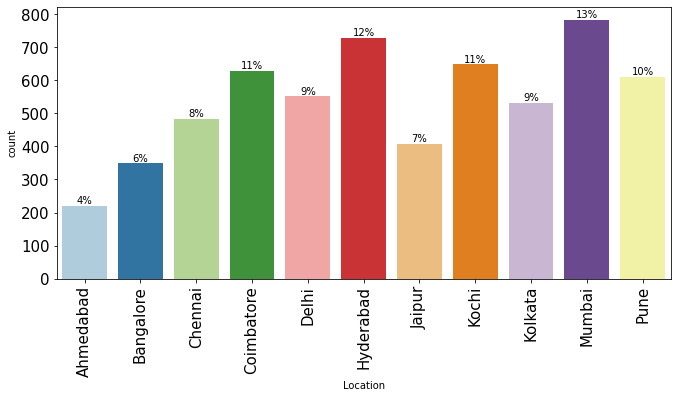

In [38]:
labeled_barplot(data=df1, feature='Location', perc=True)

- 4% of the cars were sold in ahmedabad, 12% and 13% were sold in hyderabad and mumbai respectively

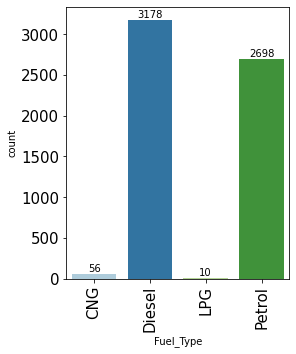

In [39]:
labeled_barplot(data=df1, feature='Fuel_Type', perc = False)

- diesel and petrol cars are the most frequently sold car in india based on our data, fewer of them use cng and lpg

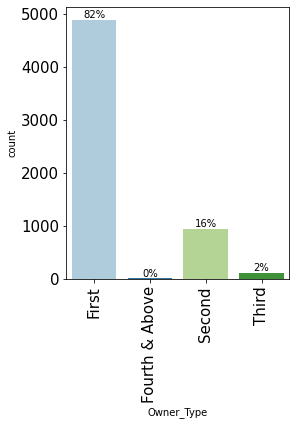

In [40]:
labeled_barplot(data=df1, feature= 'Owner_Type', perc=True)

- 82% of the cars have first tyepe of ownership, while 16% were of second.

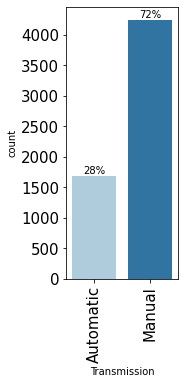

In [41]:
labeled_barplot(data=df1, feature= 'Transmission', perc=True)

- 71% of the cars are manual cars while the other 29% are automatic


### Numerical Data plots

In [42]:
#numerical columns
num_cols = df1.select_dtypes(include="number").columns
num_cols

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'log_price'],
      dtype='object')

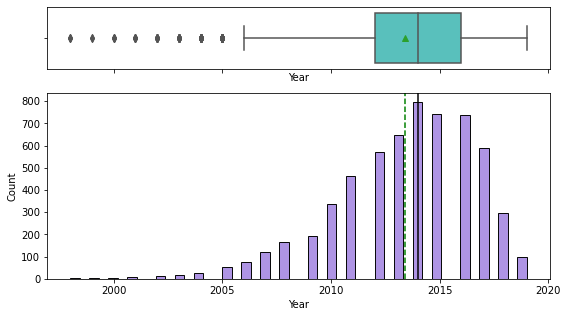

In [43]:
histogram_boxplot(data=df1, feature='Year')

- the plot shows a left skew this means that some cars were older.


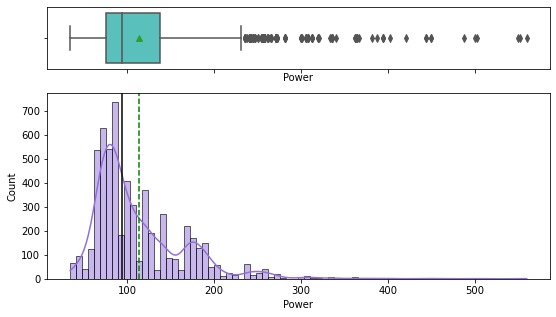

In [44]:
histogram_boxplot(data=df2, feature='Power', kde=True)

- this shows that the distribution of right skewed which means that the power of many engines are very high compared to others and there are a lot of outliers
- we will do  a log transform the data

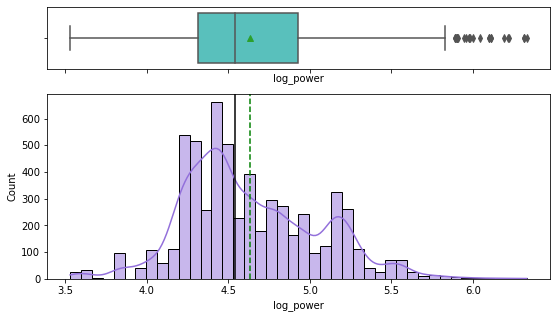

In [45]:
df1['log_power'] = np.log(df1["Power"])

histogram_boxplot(data=df1, feature='log_power', kde=True)

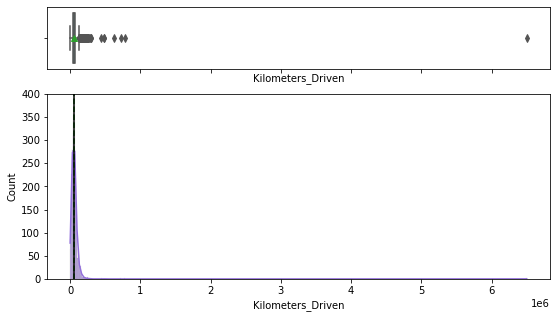

In [46]:
histogram_boxplot(data=df1, feature='Kilometers_Driven', kde=True)

- the chart shows that there are outliers and the distribution is right skewed, which means that some cars have been driven for longer distances than others

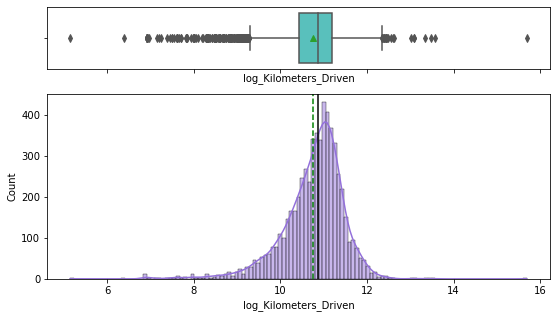

In [47]:
df1['log_Kilometers_Driven'] = np.log(df1["Kilometers_Driven"])

histogram_boxplot(data=df1, feature='log_Kilometers_Driven', kde=True)

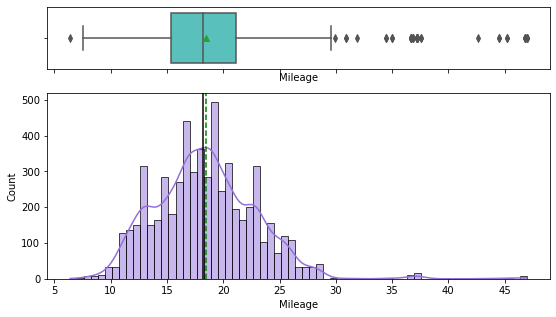

In [48]:
histogram_boxplot(data=df1, feature='Mileage', kde=True)

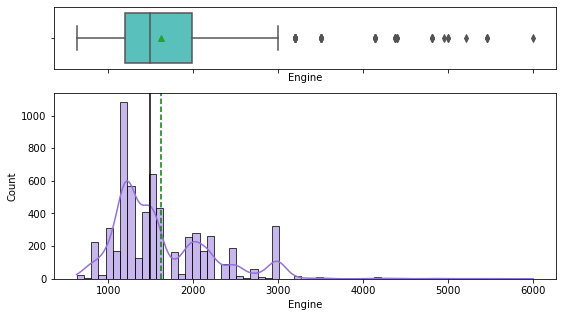

In [49]:
histogram_boxplot(data=df1, feature='Engine', kde=True)

- the chart shows a right skewed distribution with outliers. this means that the displacement volume of some engines are very high

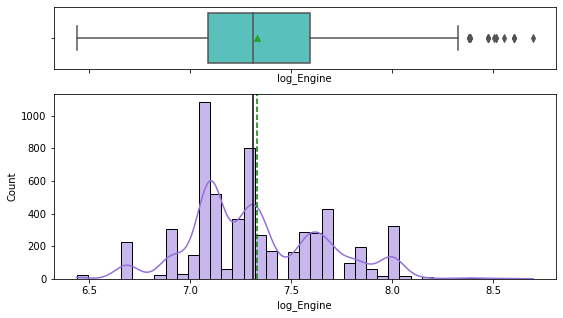

In [50]:
df1['log_Engine'] = np.log(df1["Engine"])

histogram_boxplot(data=df1, feature='log_Engine', kde=True)

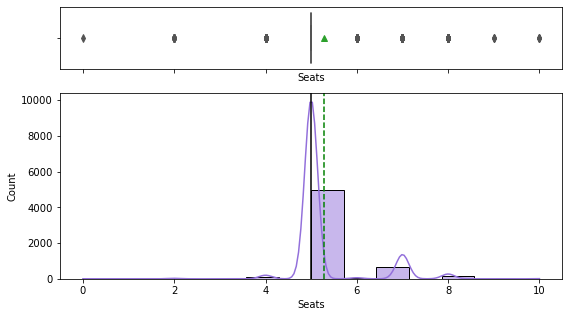

In [51]:
histogram_boxplot(data=df1, feature='Seats', kde=True)

- this tells that most cars have 5 seats.
- this column will be converted to a category

In [52]:
df1['Seats'] = df1['Seats'].astype("category")


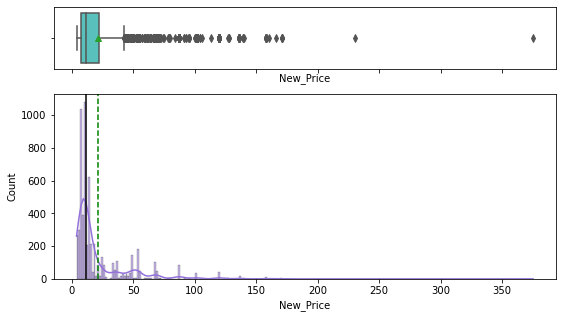

In [53]:
histogram_boxplot(data=df1, feature='New_Price', kde=True)

- the charts shows a right skew due to outliers in the data

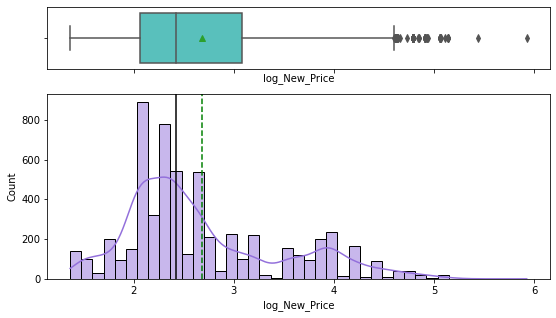

In [54]:
df1['log_New_Price'] = np.log(df1["New_Price"])

histogram_boxplot(data=df1, feature='log_New_Price', kde=True)

- transfrorming the column has brought the mean closer to the median, although perfect normal diatribution was not attained.

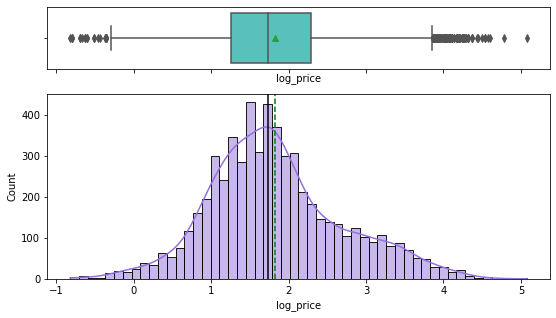

In [55]:
histogram_boxplot(data=df1, feature='log_price', kde=True)

In [56]:
df1.drop(labels=['New_Price', "Engine", "Kilometers_Driven", "Power"], axis=1, inplace=True)


### Multivariate analysis

<AxesSubplot:>

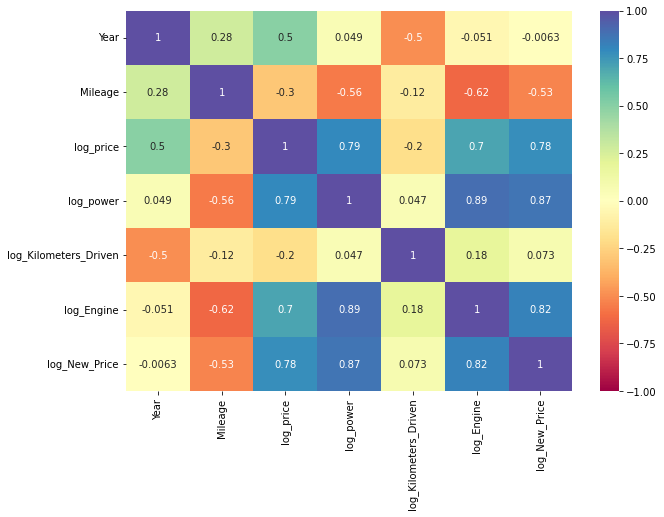

In [57]:
# plot a heat map to show correlation values
corr = df1.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=corr, vmin=-1, vmax=1, annot=True, cmap='Spectral')


- log_price is moderately corelated with year, slightly negatively correlated with mileage and log_km_driven which means that the higher the distance a car travels the lower the cost. it is highly positive correlated with log_power, log_engine, log_new_price which means that the higher the power, engine capacity or more expensive the newer version of a car is, the higher the price.

- however, log_new_price, log_power and log_engine have high correlation between them and this can cause multicolineraity. however, we will leave them but observe the degree to which they would increase variance of the model and employ regularizations such as ridge and lasso to deal with it.

In [58]:
#data1 = df1.drop(labels=["log_Engine", "log_New_Price"], axis = 1)
data1 = df1.copy()

#data1.drop("Brand", axis=1, inplace=True)

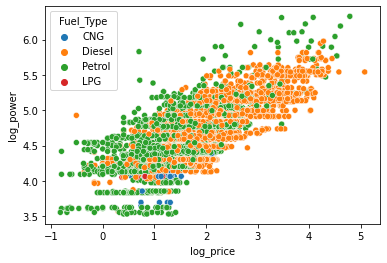

In [59]:
sns.scatterplot(data=data1, x='log_price', y = 'log_power', hue='Fuel_Type');

- this shows that cars using CNG and LPG are not as popular as other counterparts and they have lower engine power and price.
- on average, diesel cars are more expensive than petrol cars and tend to have higher power.
- however, some petrol cars seem to have higher power

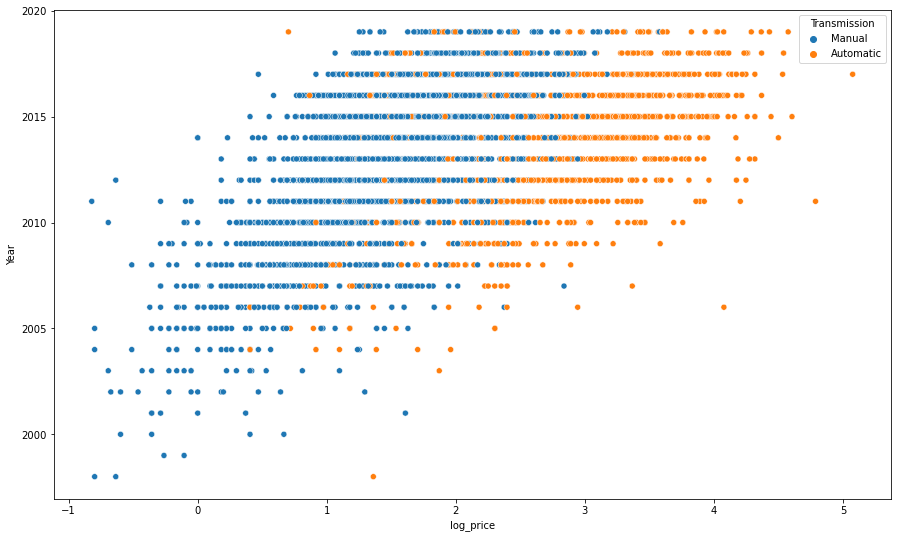

In [60]:
plt.figure(figsize=(15,9))

sns.scatterplot(data=data1, x='log_price', y = 'Year', hue='Transmission');

- this depicts that older cars use manual transmission while newer cars are automatic

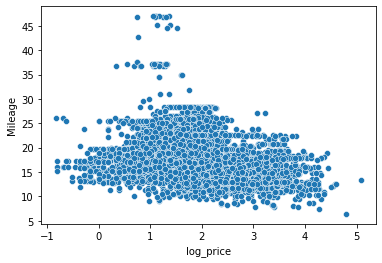

In [61]:
#plt.figure(figsize=(30,10))
sns.scatterplot(data=data1, x='log_price', y = 'Mileage');

- this shows an inverse relationship is to be expected between mileage and price. normally, fancy cars have lower mileage than other cars.

In [62]:
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')

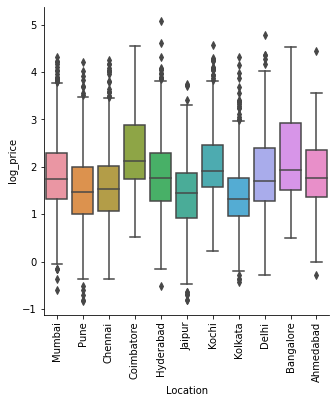

In [63]:
sns.catplot(data=data1, x='Location', y='log_price', kind="box",)
plt.xticks(rotation = 90)
plt.show()

- 75% of used cars sold in Coimbatore and bangalore seem to be the more expensive and the prices are spread uniformly such that there are no outliers.
- although 50% of used cars sold in kolkata are cheaper, the cheapest used cars were sold in jaipur.

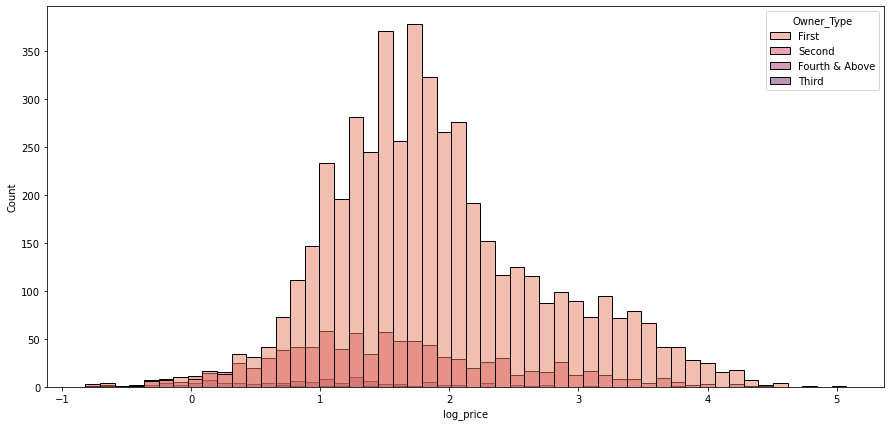

In [64]:
plt.figure(figsize=(15,7))
sns.histplot(data=data1, x="log_price", hue='Owner_Type', palette='flare',);

- the chart shows that the price used cars decreases as Owner_Typr changes.

## Visualization summary

-  columns: 'New_Price', "Engine", "Kilometers_Driven", "Power" were transformed due to skewness in their distribution. hence, these columns will be dropped before modeling to avoid multicollinearity. However, in most cases perfect normal distribution was not attained but in all cases, the mean was brought closer to the median.

- log_new_price, log_power and log_engine have high correlation between them and this can cause multicolineraity. however, we will leave them but observe the degree to which they would increase variance of the model and employ regularizations such as ridge and lasso to deal with it.

- log_price is moderately corelated with year, slightly negatively correlated with mileage and log_km_driven which means that the higher the distance a car travels the lower the cost. it is highly positive correlated with log_power, log_engine, log_new_price which means that the higher the power, engine capacity or more expensive the newer version of a car is, the higher the price.

- seats will be treated as categorical column because of its discrete nature and more information may be derived from it as a category.

### outlier detection

In [65]:
num_cols_tf = data1.select_dtypes(include="number")

#iterate over the numerical column list and plot a boxplot  for each column inside a subplot
def outlier_detector(df, numeric_columns = None):
    # create a figure
    plt.figure(figsize=(10,20))
    for ind, col in enumerate(numeric_columns):
        #4 rows, 3cols, by index
        plt.subplot(4,3, ind+1);
        #create boxplot
        plt.tight_layout()
        plt.boxplot(df[col]);
        plt.title(col)
plt.show()

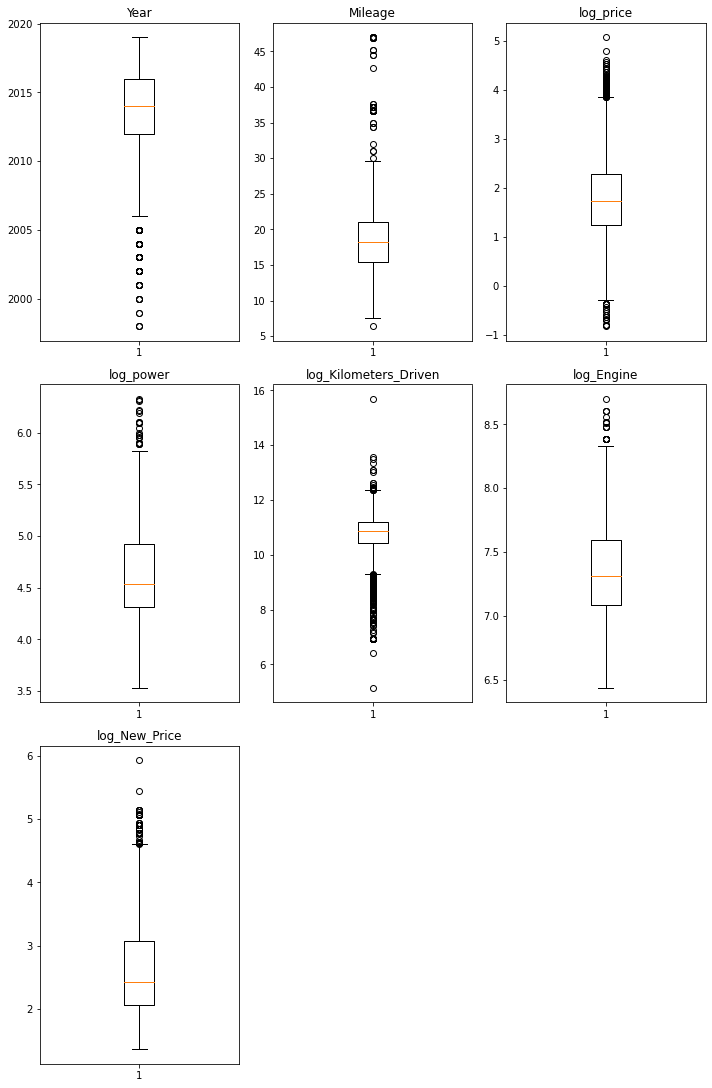

In [66]:
outlier_detector(data1, num_cols_tf)

- most of the numerical columns have outliers

### removing outliers

In [67]:
def outlier_remover(df, col):
    lower = df[col].quantile(0.25)
    upper = df[col].quantile(0.75)
    
    iqr = upper - lower
    
    low_clip = lower - 1.5 * iqr
    upper_clip = upper + 1.5 * iqr
    
    df[col] = np.clip(df[col], low_clip, upper_clip)
    return df

def remove_all_outlier(df, num_cols_tf):
    """
    treat outlier in all numerical varaibles
    num_cols_tf: list of numerical varaibles
    df: data frame
    """
    for cols in num_cols_tf:
        df = outlier_remover(df, cols)
    return df

In [68]:
remove_all_outlier(data1, num_cols_tf)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Brand,log_price,log_power,log_Kilometers_Driven,log_Engine,log_New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,CNG,Manual,First,29.65,5.0,Maruti Wagon,0.559616,4.063198,11.184421,6.905753,1.706565
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,Diesel,Manual,First,19.67,5.0,Hyundai Creta,2.525729,4.837868,10.621327,7.366445,2.776332
2,Honda Jazz V,Chennai,2011.0,Petrol,Manual,First,18.20,5.0,Honda Jazz,1.504077,4.485260,10.736397,7.089243,2.152924
3,Maruti Ertiga VDI,Chennai,2012.0,Diesel,Manual,First,20.77,7.0,Maruti Ertiga,1.791759,4.485936,11.373663,7.129298,2.422144
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,Diesel,Automatic,Second,15.20,5.0,Audi A4,2.875822,4.947340,10.613246,7.584773,3.972930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,Maruti Swift VDI,Delhi,2014.0,Diesel,Manual,First,28.40,5.0,Maruti Swift,1.558145,4.304065,10.217020,7.129298,2.064328
5938,Hyundai Xcent 1.1 CRDi S,Jaipur,2015.0,Diesel,Manual,First,24.40,5.0,Hyundai Xcent,1.386294,4.262680,11.512925,7.021084,2.107786
5939,Mahindra Xylo D4 BSIV,Jaipur,2012.0,Diesel,Manual,Second,14.00,8.0,Mahindra Xylo,1.064711,4.718499,10.915088,7.823246,2.457021
5940,Maruti Wagon R VXI,Kolkata,2013.0,Petrol,Manual,First,18.90,5.0,Maruti Wagon,0.974560,4.206184,10.736397,6.905753,1.706565


### check for outliers in data1

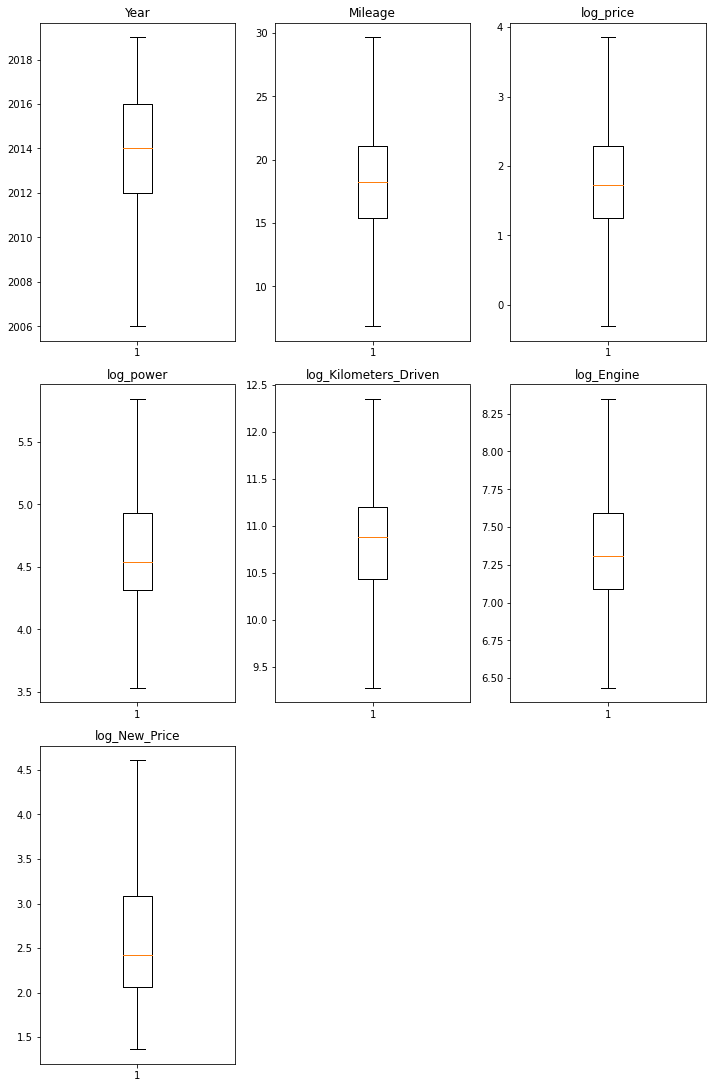

In [69]:
outlier_detector(data1, num_cols_tf)

- all outliers in both datasets have been treated

### Build Machine Model using data1

In [70]:
#create dummy varibales for categorical variables
model_data = data1.drop(["Name", "Brand"], axis = 1)

cat_cols = model_data.select_dtypes(exclude='number')
model_data = pd.get_dummies(data= model_data, drop_first=True)

In [71]:
pd.set_option("display.max_columns", None)
model_data

,Year,Mileage,log_price,log_power,log_Kilometers_Driven,log_Engine,log_New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010.0,29.65,0.559616,4.063198,11.184421,6.905753,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2015.0,19.67,2.525729,4.837868,10.621327,7.366445,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2011.0,18.20,1.504077,4.485260,10.736397,7.089243,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,2012.0,20.77,1.791759,4.485936,11.373663,7.129298,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2013.0,15.20,2.875822,4.947340,10.613246,7.584773,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,2014.0,28.40,1.558145,4.304065,10.217020,7.129298,2.064328,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5938,2015.0,24.40,1.386294,4.262680,11.512925,7.021084,2.107786,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5939,2012.0,14.00,1.064711,4.718499,10.915088,7.823246,2.457021,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
5940,2013.0,18.90,0.974560,4.206184,10.736397,6.905753,1.706565,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0


In [72]:
#define independent variables
X = model_data.drop(["log_price"], axis=1)

#define dependent variable
y = model_data["log_price"]

In [73]:
#split the data, train size of 0.8

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [74]:
x_train.shape

(4753, 31)

In [75]:
#standardize the features
#create an object of  the class
scaler = StandardScaler()

#apply fit_transform on train
x_train_sc = scaler.fit_transform(x_train)

#apply transform on test
x_test_sc = scaler.transform(x_test)

In [76]:
#build the model
lin_reg = LinearRegression()

lin_reg.fit(x_train_sc, y_train)

LinearRegression()

In [77]:
lin_reg.coef_

array([ 0.35120125,  0.00783471,  0.26785737, -0.05804155,  0.04118008,
        0.32939226,  0.03724253,  0.01035   ,  0.02662498, -0.01852003,
        0.04507408, -0.01124204, -0.01585219, -0.06801374, -0.02719823,
       -0.01535703,  0.00181721,  0.00128991, -0.0682222 , -0.06903037,
        0.00344832, -0.0277234 , -0.02656838,  0.00550684, -0.01624578,
       -0.08211551, -0.01188305, -0.04416194, -0.01612159, -0.00691798,
       -0.00100977])

In [78]:
x_train.columns

Index(['Year', 'Mileage', 'log_power', 'log_Kilometers_Driven', 'log_Engine',
       'log_New_Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Seats_2.0', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0'],
      dtype='object')

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [80]:
#model performance on train
model_performance_regression(lin_reg, x_train_sc, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238285,0.176421,0.922673,0.922165,inf


- this means that on the train data, the model reports that 92.2% of the variations in the log_price was explained by the dependent variables.
- the rmse is 0.23  while the mae is 0.17
- the mape is infinity which is because of some divisions done with zero value

In [81]:
#model performance on test data
model_performance_regression(lin_reg, x_test_sc, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240146,0.181516,0.915037,0.912761,inf


- the model is performing well on the test dataset, which indicates that the model generalizing well.
- i will regulate the parameters using ridge and lasso and evaluate the performance better.

### regularization of model parameters

### Lasso Regression

In [82]:
lasso = Lasso(alpha=0.4)

lasso.fit(x_train_sc, y_train)

Lasso(alpha=0.4)

In [83]:
#lasso train model perf
model_performance_regression(lasso, x_train_sc, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.636686,0.495943,0.447932,0.444307,inf


- based on theR-squared, the lasso model on the train data shows that it is able to explain 44% of the variations of the target from the independent variables.

- the rmse and mae are 0.64 and 0.49 respectively

In [84]:
#lasso test model perf

model_performance_regression(lasso, x_test_sc, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.617817,0.473911,0.437661,0.422594,inf


- from the testing, the lasso model has similar R2, and error values


### Ridge Regression

In [85]:
ridge = Ridge()

ridge.fit(x_train_sc, y_train)

Ridge()

In [86]:
ridge.coef_

array([ 3.51087569e-01,  7.91715764e-03,  2.67551798e-01, -5.80778379e-02,
        4.16349893e-02,  3.29214135e-01,  3.72571493e-02,  1.03479045e-02,
        2.66650027e-02, -1.84905844e-02,  4.50976965e-02, -1.12329469e-02,
       -1.58023750e-02, -6.79938358e-02, -2.71671721e-02, -1.53400855e-02,
        2.31476109e-03,  1.31853144e-03, -6.76758423e-02, -6.91417414e-02,
        3.44048001e-03, -2.77425302e-02, -2.65863010e-02,  7.46278573e-03,
       -1.11446353e-02, -6.75789632e-02, -9.18403294e-03, -3.15903318e-02,
       -1.04568137e-02, -5.94639865e-03,  1.05565748e-04])

In [87]:
x_train.columns

Index(['Year', 'Mileage', 'log_power', 'log_Kilometers_Driven', 'log_Engine',
       'log_New_Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Seats_2.0', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0'],
      dtype='object')

- from the parameters, it means that holding all variables constant, if the year of a car increases by 1,the log_price would increase by 0.35 . while, for every more log_kilometer the car has driven, the log_price of the car would decrease by 0.058  holding every variable constant.

In [88]:
mdf1_train = model_performance_regression(ridge, x_train_sc, y_train)
mdf1_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238285,0.176437,0.922672,0.922164,inf


- this means that 92% of the variation of the target is explained by the features in the train set
- it shows similar RMSE and MAE with the linear model
- the mape remain at infinity

In [89]:
mdf1_test = model_performance_regression(ridge, x_test_sc, y_test)
mdf1_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240149,0.181524,0.915035,0.912758,inf


- 91% of the variations in target was explained by the features of the test data.
- the RMSE and MAE were 0.24 and 0.18



### feature selection

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [91]:
#perform a forwars feature selection on the ridge model
sfs = SFS(estimator=ridge,verbose=2, n_jobs = -1, 
          k_features = x_train.shape[1])

In [92]:
sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    4.4s finished

[2023-02-05 09:28:51] Features: 1/31 -- score: 0.6299384882749187[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished

[2023-02-05 09:28:52] Features: 2/31 -- score: 0.8372868519373415[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.3s finished

[2023-02-05 09:28:52] Features: 3/31 -- score: 0.8951596260734199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.3s finished

[2023-02-05 09:28:52] Features: 4/31 -- score: 0.9007512369486628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

SequentialFeatureSelector(estimator=Ridge(), k_features=(31, 31), n_jobs=-1,
                          scoring='r2', verbose=2)

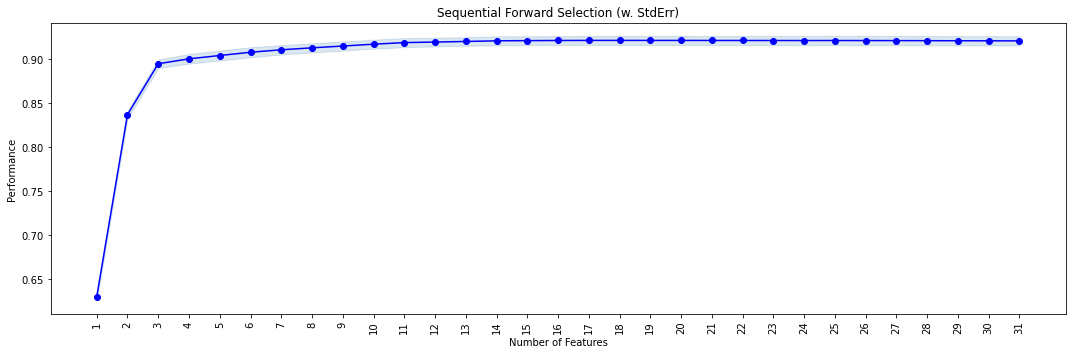

In [93]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()


- this plot shows that 12 features are best contributing to the model.
- view and retrain the model using only these features

In [94]:
sfs = SFS(estimator=ridge,verbose=2, n_jobs = -1, 
          k_features = 12)
sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished

[2023-02-05 09:29:01] Features: 1/12 -- score: 0.6299384882749187[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished

[2023-02-05 09:29:01] Features: 2/12 -- score: 0.8372868519373415[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  29 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.3s finished

[2023-02-05 09:29:02] Features: 3/12 -- score: 0.8951596260734199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.3s finished

[2023-02-05 09:29:02] Features: 4/12 -- score: 0.9007512369486628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

SequentialFeatureSelector(estimator=Ridge(), k_features=(12, 12), n_jobs=-1,
                          scoring='r2', verbose=2)

In [95]:
good_features = list(sfs.k_feature_idx_)

#x_train[x_train.columns[good_features]]
x_test[x_test.columns[good_features]].columns

Index(['Year', 'log_power', 'log_Kilometers_Driven', 'log_New_Price',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Hyderabad',
       'Location_Kolkata', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Seats_5.0'],
      dtype='object')

- the ridge and linear model, gives similar result

In [96]:
#train the model with important features onlt
x_train_new = x_train[x_train.columns[good_features]]

x_test_new = x_test[x_test.columns[good_features]]

In [97]:
#scale the datasets
x_train_new = scaler.fit_transform(x_train_new)

x_test_new = scaler.transform(x_test_new)

In [98]:
#train the model
ridge2 = Ridge()

ridge2.fit(x_train_new, y_train)

Ridge()

In [99]:
#train model perfromance
mdf2_train = model_performance_regression(ridge2, x_train_new, y_train)
mdf2_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241891,0.178927,0.920314,0.920112,inf


In [100]:
#test model performance
mdf2_test = model_performance_regression(ridge2, x_test_new, y_test)
mdf2_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241855,0.181489,0.913823,0.912944,inf


- this shows that with 12 features that best contribute to the model we can achieve close results relative to when we use all the features.

- let us compare the performance

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [mdf1_train.T, mdf2_train.T], axis=1,
)

models_train_comp_df.columns = [
    "Ridge Regression sklearn",
    "Ridge Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Ridge Regression sklearn,Ridge Regression sklearn (SFS features)
RMSE,0.238285,0.241891
MAE,0.176437,0.178927
R-squared,0.922672,0.920314
Adj. R-squared,0.922164,0.920112
MAPE,inf,inf


In [102]:
# test performance comparison

models_test_comp_df = pd.concat(
    [mdf1_test.T, mdf2_test.T], axis=1,
)

models_test_comp_df.columns = [
    "Ridge Regression sklearn",
    "Ridge Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Ridge Regression sklearn,Ridge Regression sklearn (SFS features)
RMSE,0.240149,0.241855
MAE,0.181524,0.181489
R-squared,0.915035,0.913823
Adj. R-squared,0.912758,0.912944
MAPE,inf,inf


**I will choose the Ridge model as the final model because it gives similar performance as the linear model and is better at handling parameters that could cause mullticolinearity

## Insights

- the decision to exclude the brand and Name columns is based on the following
    - 1. it would limit our model to only predict the price of the cars of similar models in our dataset, since the category would have been converted to columns durring encoding.
    - 2. during EDA, we saw that same brand of cars have proven to have certain similar properties so our model can learn of car type inherently.

- we have been able to capture 91% variation in our model.
    
- from the model, it explains that used cars with higher value in 'Year', 'Mileage', and 'log_power', cost more. 
- location where a car is sold affects the log_price of the car. cars sold in delhi have lesser log_price than those in chennai, if other parameters are constant.

## Business Recommendations
* based on the model parameters,
    - selling newer cars will increase profit
    - situating our car stands in certain locations like Hyderabad can increase profit.
    - focus mostly on diesel and petrol cars.
    - selling used cars with lower kilometer driven will augment profit
    - selling used cars that have their new versions to be expensive can be profitable.
